<a href="https://colab.research.google.com/github/Basharul2002/AI/blob/main/22_47903_2_Week_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

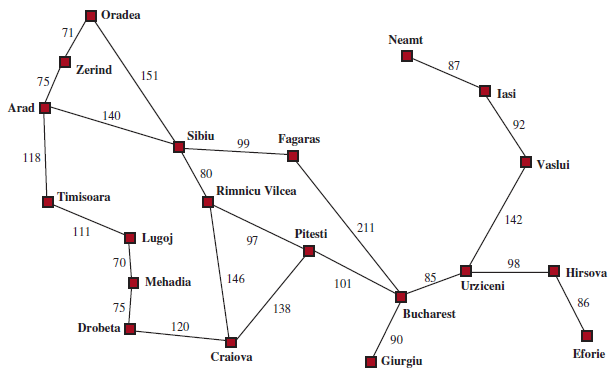

**Figure 3.1** A simplified road map of part of Romania, with road distances in miles.

In [ ]:
romanian_map_graph = {
    'Arad': {'Sibiu':140, 'Zerind':75, 'Timisoara':118},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

# Uniform Cost Search

In [ ]:
from queue import PriorityQueue

def ucs(start, goal, G):
    expanded = [] # to store expanded nodes
    frontier = PriorityQueue()
    g = {}  # to store actual path cost from start node
    g[start] = 0
    frontier.put((g[start],start,[start]))
    i = 1
    while not frontier.empty():
        unode = frontier.get() # select a node for expansion
        u = unode[1]

        if u in expanded:# if a u is already expanded, no need to expand again
          continue
        print()
        print(u+ " selected. Cost: "+ str(unode[0]))

        if u == goal:# goal test
            print("*** GOAL TEST SATISFIED ***")
            print()
            return unode # path

        expanded.append(u)
        print('['+str(i)+']: '+u+" expanding...")
        i = i +1

        for v in G[u].keys():#expanding
            if v not in expanded:
                g[v] = unode[0] + G[u][v]
                path = unode[2] + [v]
                frontier.put((g[v],v,path))
                print(u + "->"+v +" : " + str(G[u][v]))

        for n in frontier.queue:
          print(n[1]+': '+ str(n[0]))

    print('Failed')

In [ ]:
ucs('Arad', 'Bucharest', romanian_map_graph)


Arad selected. Cost: 0
[1]: Arad expanding...
Arad->Sibiu : 140
Arad->Zerind : 75
Arad->Timisoara : 118
Zerind: 75
Sibiu: 140
Timisoara: 118

Zerind selected. Cost: 75
[2]: Zerind expanding...
Zerind->Oradea : 71
Timisoara: 118
Sibiu: 140
Oradea: 146

Timisoara selected. Cost: 118
[3]: Timisoara expanding...
Timisoara->Lugoj : 111
Sibiu: 140
Oradea: 146
Lugoj: 229

Sibiu selected. Cost: 140
[4]: Sibiu expanding...
Sibiu->Oradea : 151
Sibiu->Fagaras : 99
Sibiu->Rimnicu : 80
Oradea: 146
Rimnicu: 220
Oradea: 291
Fagaras: 239
Lugoj: 229

Oradea selected. Cost: 146
[5]: Oradea expanding...
Rimnicu: 220
Lugoj: 229
Oradea: 291
Fagaras: 239

Rimnicu selected. Cost: 220
[6]: Rimnicu expanding...
Rimnicu->Craiova : 146
Rimnicu->Pitesti : 97
Lugoj: 229
Fagaras: 239
Oradea: 291
Craiova: 366
Pitesti: 317

Lugoj selected. Cost: 229
[7]: Lugoj expanding...
Lugoj->Mehadia : 70
Fagaras: 239
Mehadia: 299
Oradea: 291
Craiova: 366
Pitesti: 317

Fagaras selected. Cost: 239
[8]: Fagaras expanding...
Fagara

(418, 'Bucharest', ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest'])

Based on the above UCS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

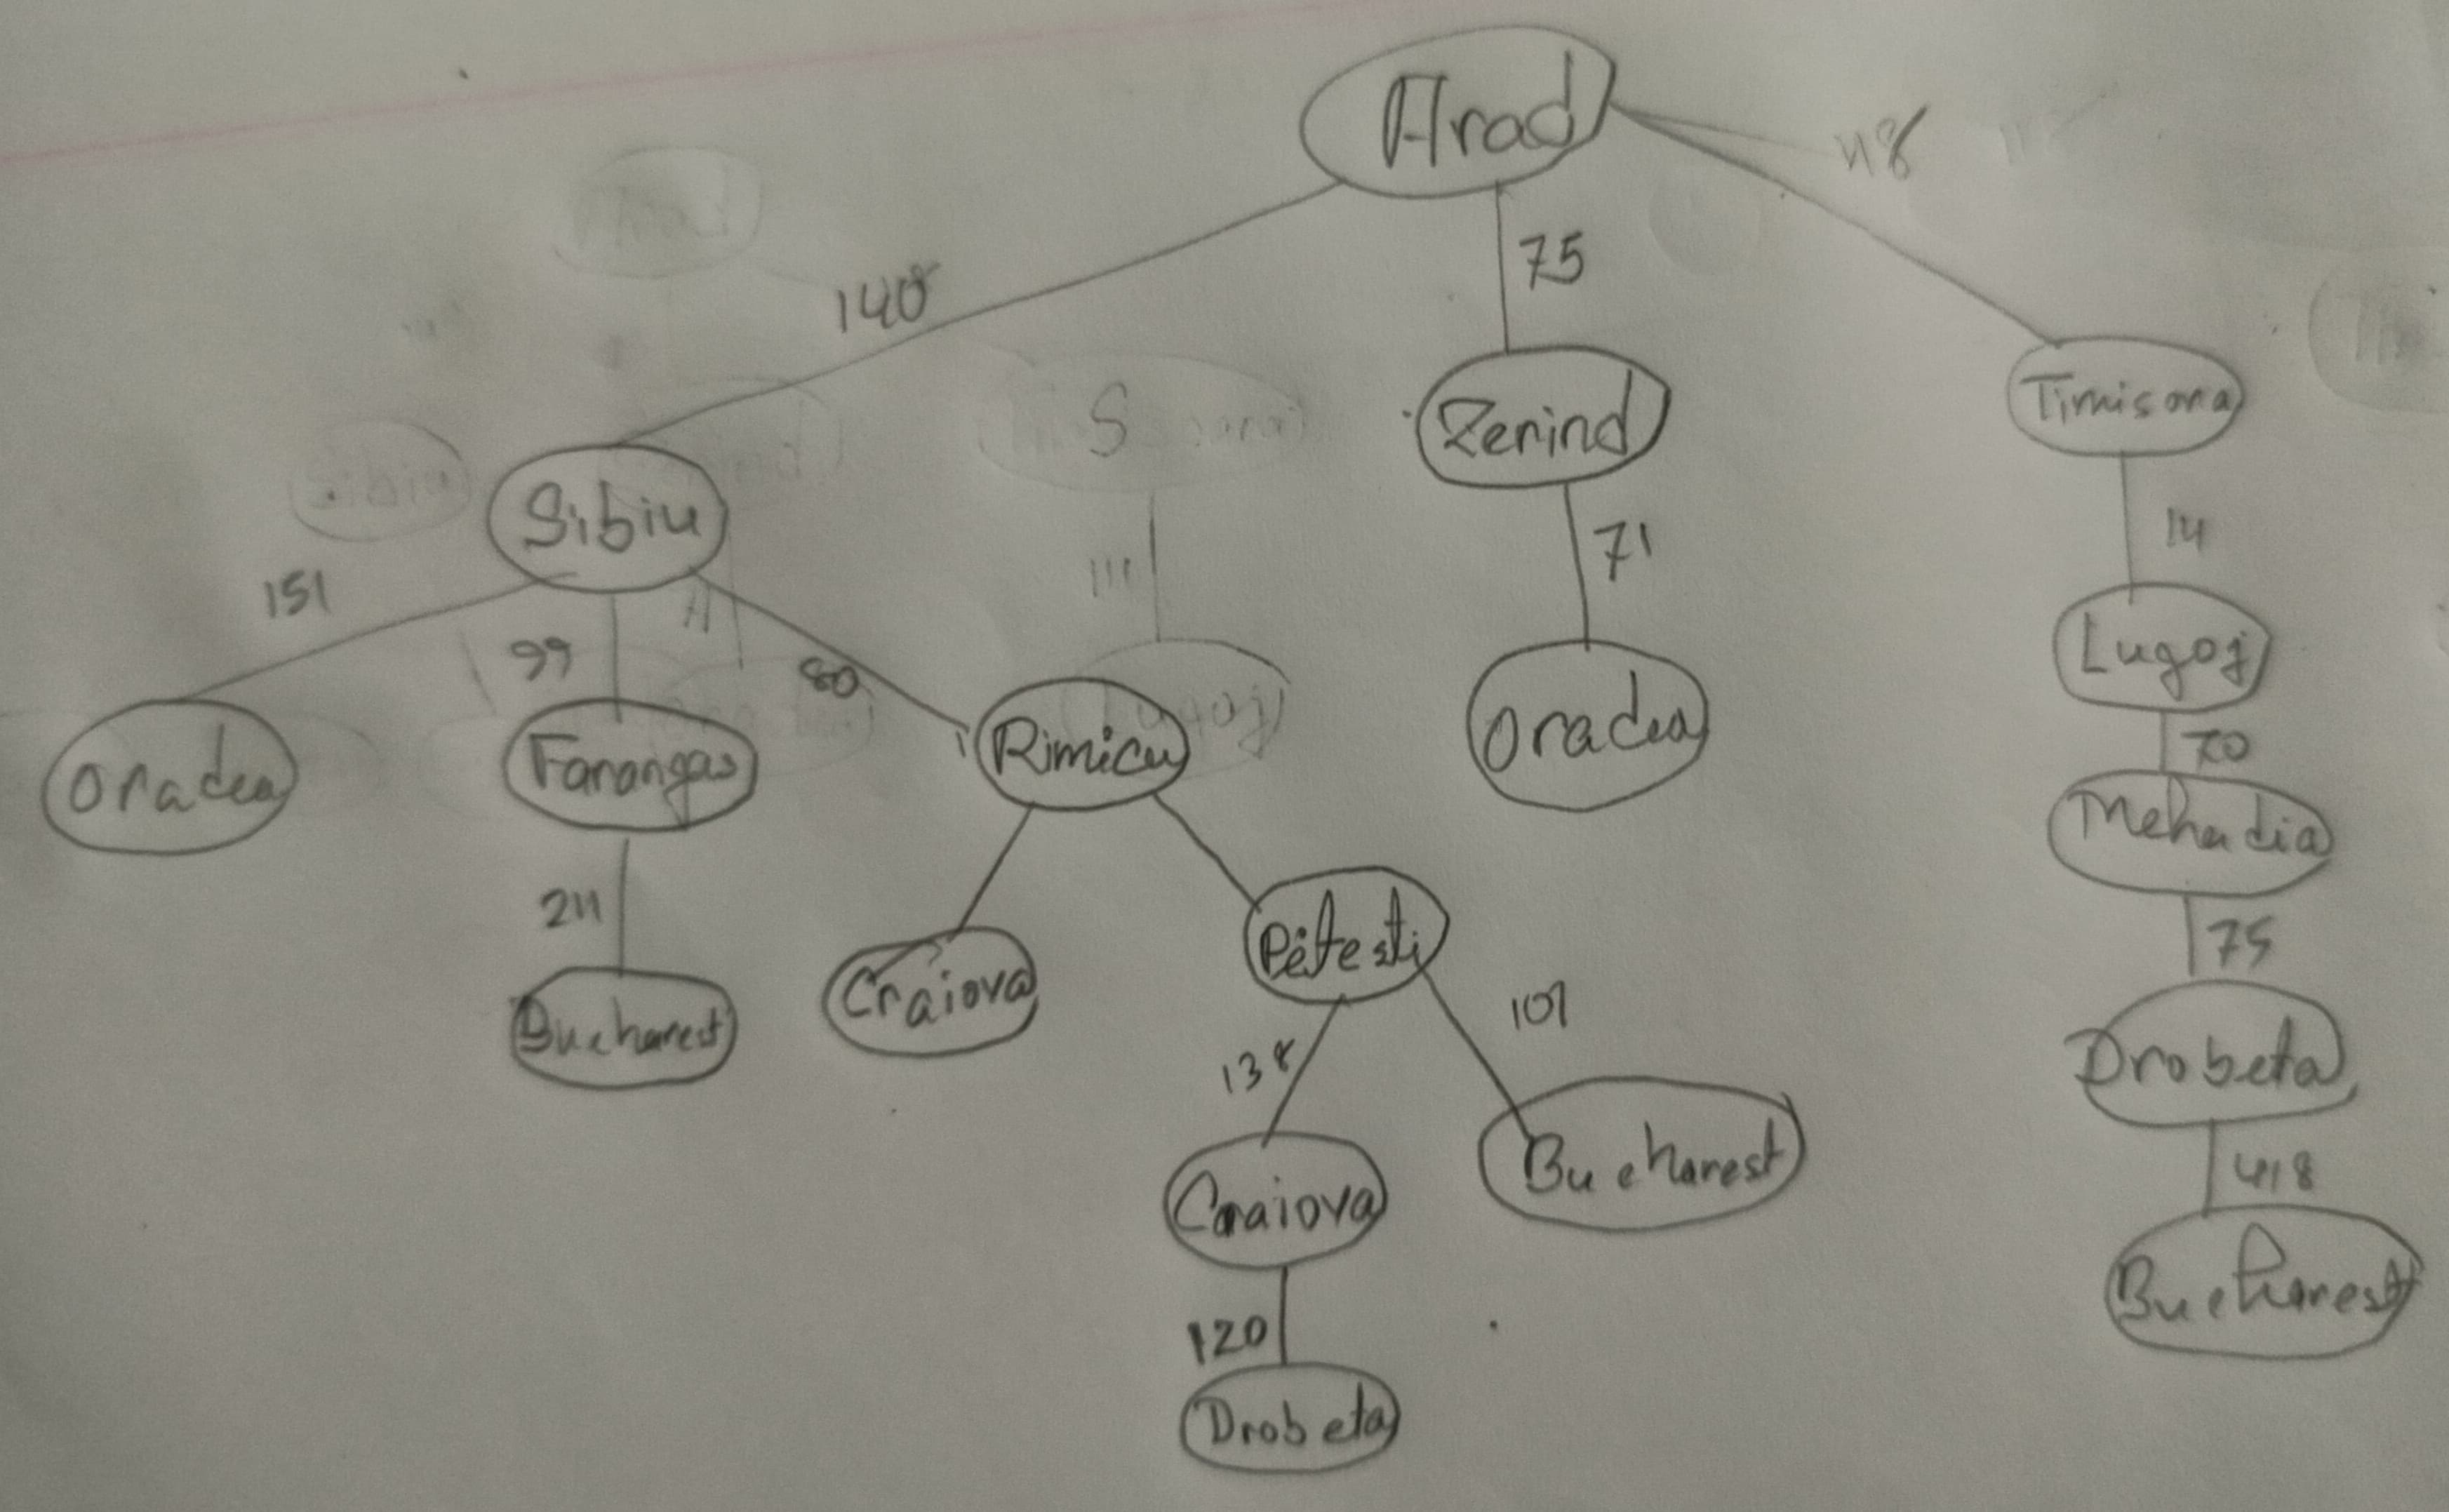

# Greedy Best First Search

In [ ]:
h_rm = {'Arad': 366, 'Zerind': 374, 'Oradea': 380, 'Sibiu': 253,
    'Timisoara': 329, 'Lugoj': 244, 'Mehadia': 241,
    'Drobeta': 242, 'Craiova': 160, 'Rimnicu': 193,
    'Fagaras': 176, 'Pitesti': 100, 'Bucharest': 0,
    'Giurgiu': 77, 'Urziceni': 80, 'Hirsova': 151,
    'Eforie': 161, 'Vaslui': 199, 'Iasi': 226, 'Neamt': 234}

In [ ]:
from queue import PriorityQueue

def gbfs(start, goal, G, h):
    expanded = [] # to store expanded nodes
    frontier = PriorityQueue()
    g = {}  # to store actual path cost from start node
    g[start] = 0
    frontier.put((h[start],start,[start],0))
    i = 1
    while not frontier.empty():
        unode = frontier.get() # select a node for expansion
        u = unode[1]
        if u in expanded:
          continue
        print()
        print(u+ " selected. Cost: "+ str(unode[0]))
        if u == goal:# goal test
            print("*** GOAL TEST SATISFIED ***")
            print()
            return unode # path
        expanded.append(u)
        print('['+str(i)+']: '+u+" expanding...")
        i = i +1
        for v in G[u].keys():#expanding
            if v not in expanded:
                g[v] = unode[3] + G[u][v]
                path = unode[2] + [v]
                frontier.put((h[v],v,path,g[v]))
                print(u + "->"+v +" : " + str(G[u][v]))
        for n in frontier.queue:
          print(n[1]+': '+ str(n[0]))
    print('Failed')

In [ ]:
gbfs('Arad', 'Bucharest', romanian_map_graph, h_rm) # change source only


Arad selected. Cost: 366
[1]: Arad expanding...
Arad->Sibiu : 140
Arad->Zerind : 75
Arad->Timisoara : 118
Sibiu: 253
Zerind: 374
Timisoara: 329

Sibiu selected. Cost: 253
[2]: Sibiu expanding...
Sibiu->Oradea : 151
Sibiu->Fagaras : 99
Sibiu->Rimnicu : 80
Fagaras: 176
Rimnicu: 193
Oradea: 380
Zerind: 374
Timisoara: 329

Fagaras selected. Cost: 176
[3]: Fagaras expanding...
Fagaras->Bucharest : 211
Bucharest: 0
Rimnicu: 193
Oradea: 380
Zerind: 374
Timisoara: 329

Bucharest selected. Cost: 0
*** GOAL TEST SATISFIED ***



(0, 'Bucharest', ['Arad', 'Sibiu', 'Fagaras', 'Bucharest'], 450)

Based on the above GBFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)


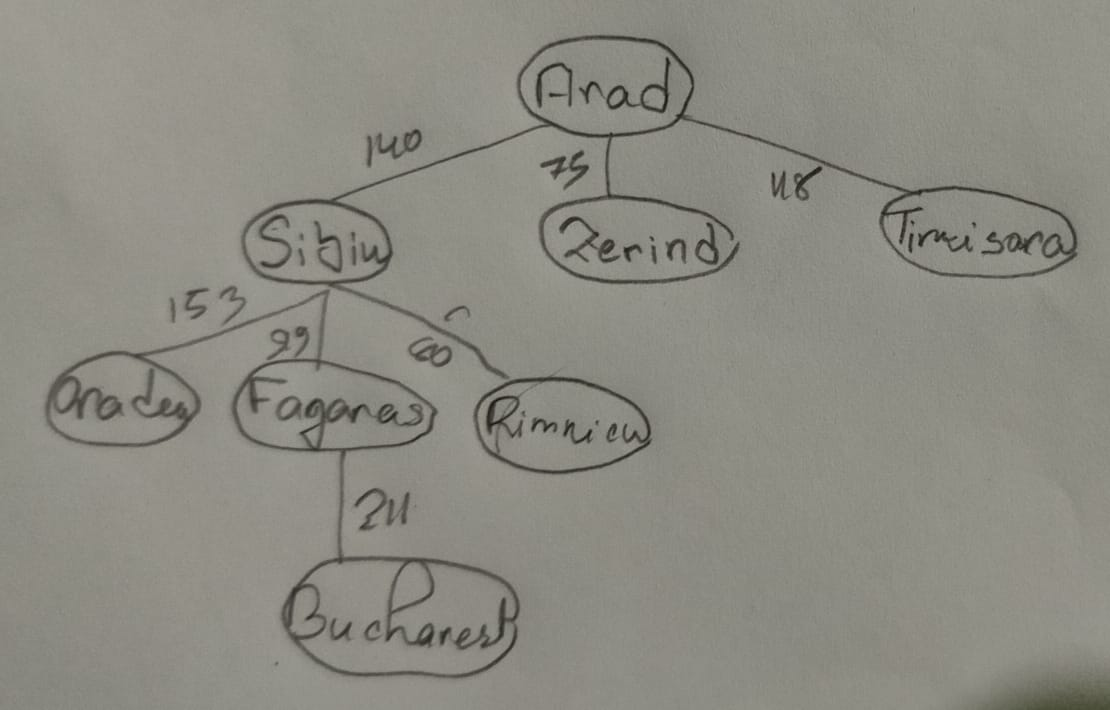

# A*

In [ ]:
# code A* here
from queue import PriorityQueue

def a_star(start, goal, G, h):
    expanded = []
    frontier = PriorityQueue()
    g = {}
    g[start] = 0
    frontier.put((h[start], start, [start], 0))  # (f = g + h)

    i = 1
    while not frontier.empty():
        unode = frontier.get()
        u = unode[1]
        if u in expanded:
            continue
        print()
        print(u + " selected. Cost: " + str(unode[0]))

        if u == goal:
            print("*** GOAL TEST SATISFIED ***")
            print()
            return unode

        expanded.append(u)
        print('[' + str(i) + ']: ' + u + " expanding...")
        i += 1

        for v in G[u].keys():
            if v not in expanded:
                g[v] = unode[3] + G[u][v]
                f = g[v] + h[v]
                path = unode[2] + [v]
                frontier.put((f, v, path, g[v]))
                print(u + "->" + v + " : " + str(G[u][v]))

        for n in frontier.queue:
            print(n[1] + ': ' + str(n[0]))

    print('Failed')


In [ ]:
# Call A* here for the Romanian map
a_star('Arad', 'Bucharest', romanian_map_graph, h_rm)


Arad selected. Cost: 366
[1]: Arad expanding...
Arad->Sibiu : 140
Arad->Zerind : 75
Arad->Timisoara : 118
Sibiu: 393
Zerind: 449
Timisoara: 447

Sibiu selected. Cost: 393
[2]: Sibiu expanding...
Sibiu->Oradea : 151
Sibiu->Fagaras : 99
Sibiu->Rimnicu : 80
Rimnicu: 413
Fagaras: 415
Oradea: 671
Zerind: 449
Timisoara: 447

Rimnicu selected. Cost: 413
[3]: Rimnicu expanding...
Rimnicu->Craiova : 146
Rimnicu->Pitesti : 97
Fagaras: 415
Timisoara: 447
Pitesti: 417
Zerind: 449
Craiova: 526
Oradea: 671

Fagaras selected. Cost: 415
[4]: Fagaras expanding...
Fagaras->Bucharest : 211
Pitesti: 417
Timisoara: 447
Bucharest: 450
Zerind: 449
Craiova: 526
Oradea: 671

Pitesti selected. Cost: 417
[5]: Pitesti expanding...
Pitesti->Craiova : 138
Pitesti->Bucharest : 101
Bucharest: 418
Zerind: 449
Timisoara: 447
Oradea: 671
Craiova: 526
Craiova: 615
Bucharest: 450

Bucharest selected. Cost: 418
*** GOAL TEST SATISFIED ***



(418, 'Bucharest', ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest'], 418)

Based on the above A* simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)


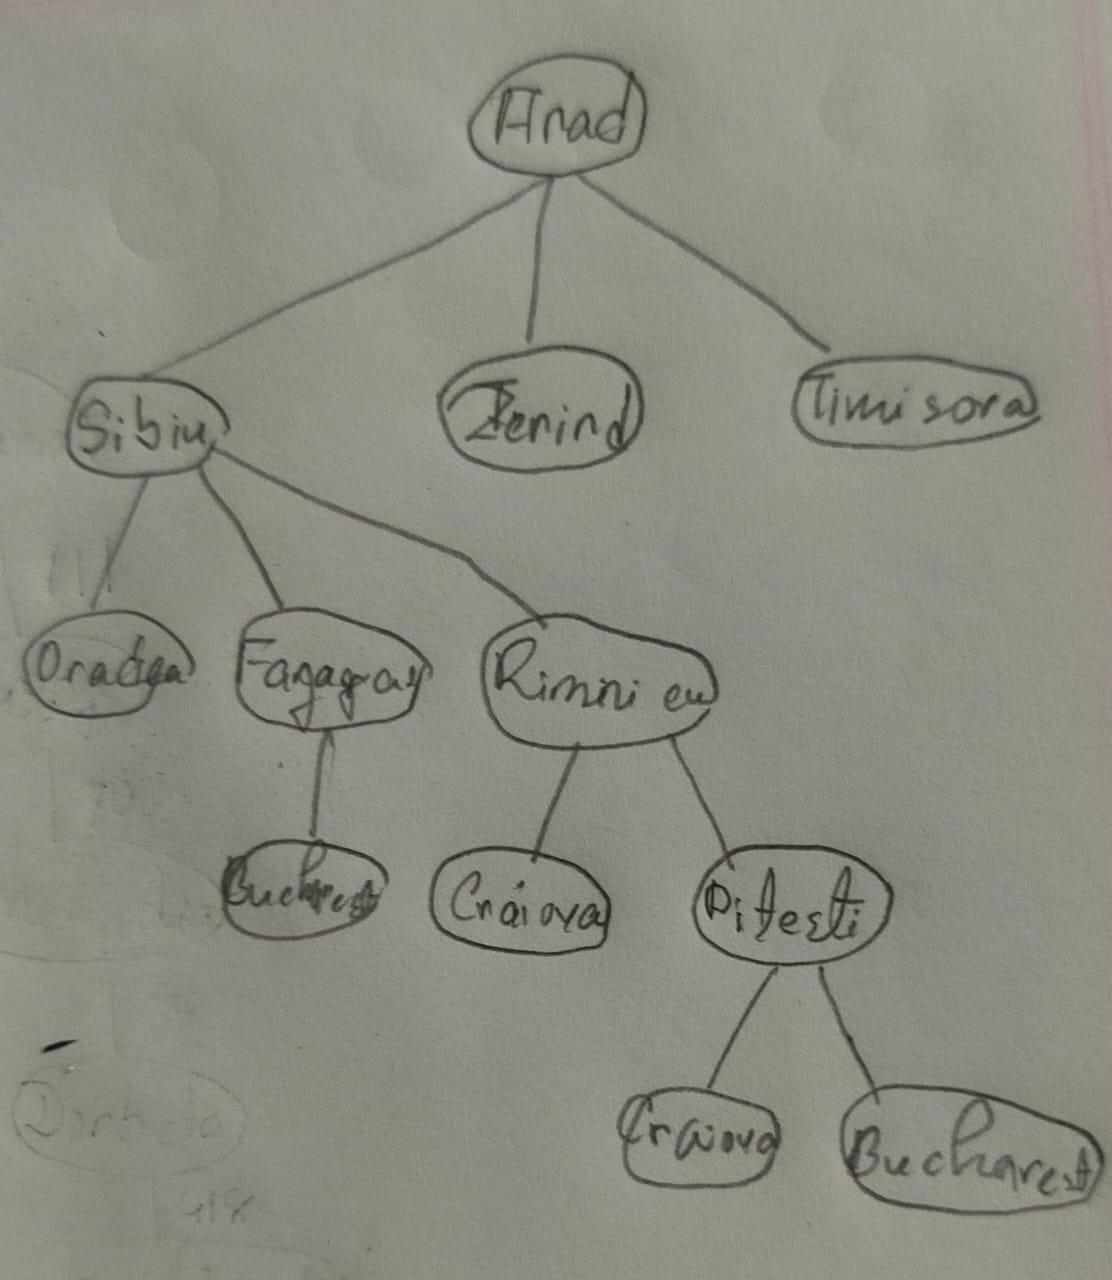

# Another Example

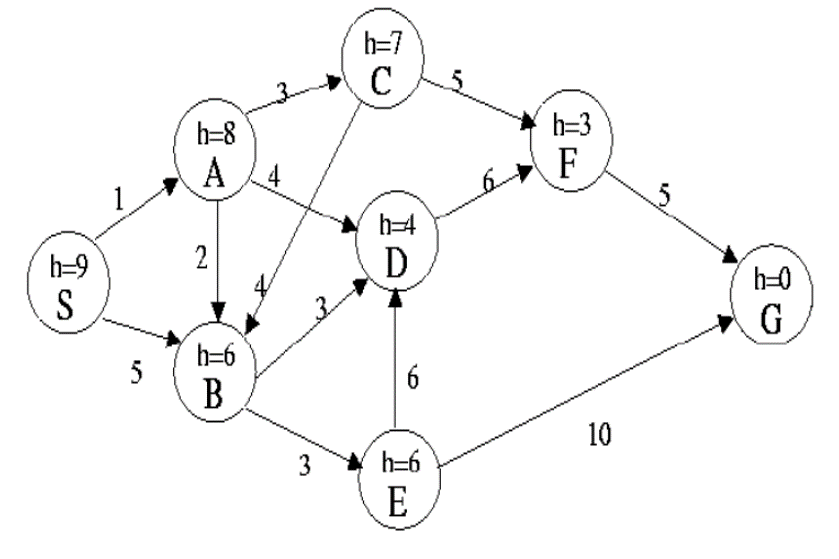

In the above graph, the start state is **S**, and the goal state is **G**. The transition costs are next to the edges, and the heuristic estimate, h, of the distance from the state to the goal is in the state’s node.
<br>
Call **UCS**, **GBF** and  **A star** for this graph. Also insert the drawing of simulations one by one.

In [ ]:
example_graph = {
    'S': {'A': 1, 'B': 5},
    'A': {'B': 2, 'C': 3},
    'B': {'D': 3, 'E' : 3},
    'C': {'B': 4, 'F' : 5},
    'D': {'F': 6},
    'E': {'D': 6, 'G': 10},
    'F': {'G': 5},
    'G': {}
}

h_another_exm = {
    'S': 9,
    'A': 8,
    'B': 6,
    'C': 7,
    'D': 4,
    'E': 6,
    'F': 3,
    'G': 0
}

In [ ]:
# call UCS for the above graph here

ucs('S', 'G', example_graph)


S selected. Cost: 0
[1]: S expanding...
S->A : 1
S->B : 5
A: 1
B: 5

A selected. Cost: 1
[2]: A expanding...
A->B : 2
A->C : 3
B: 3
B: 5
C: 4

B selected. Cost: 3
[3]: B expanding...
B->D : 3
B->E : 3
C: 4
B: 5
D: 6
E: 6

C selected. Cost: 4
[4]: C expanding...
C->F : 5
B: 5
E: 6
D: 6
F: 9

D selected. Cost: 6
[5]: D expanding...
D->F : 6
E: 6
F: 9
F: 12

E selected. Cost: 6
[6]: E expanding...
E->G : 10
F: 9
F: 12
G: 16

F selected. Cost: 9
[7]: F expanding...
F->G : 5
F: 12
G: 16
G: 14

G selected. Cost: 14
*** GOAL TEST SATISFIED ***



(14, 'G', ['S', 'A', 'C', 'F', 'G'])

Based on the above UCS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)



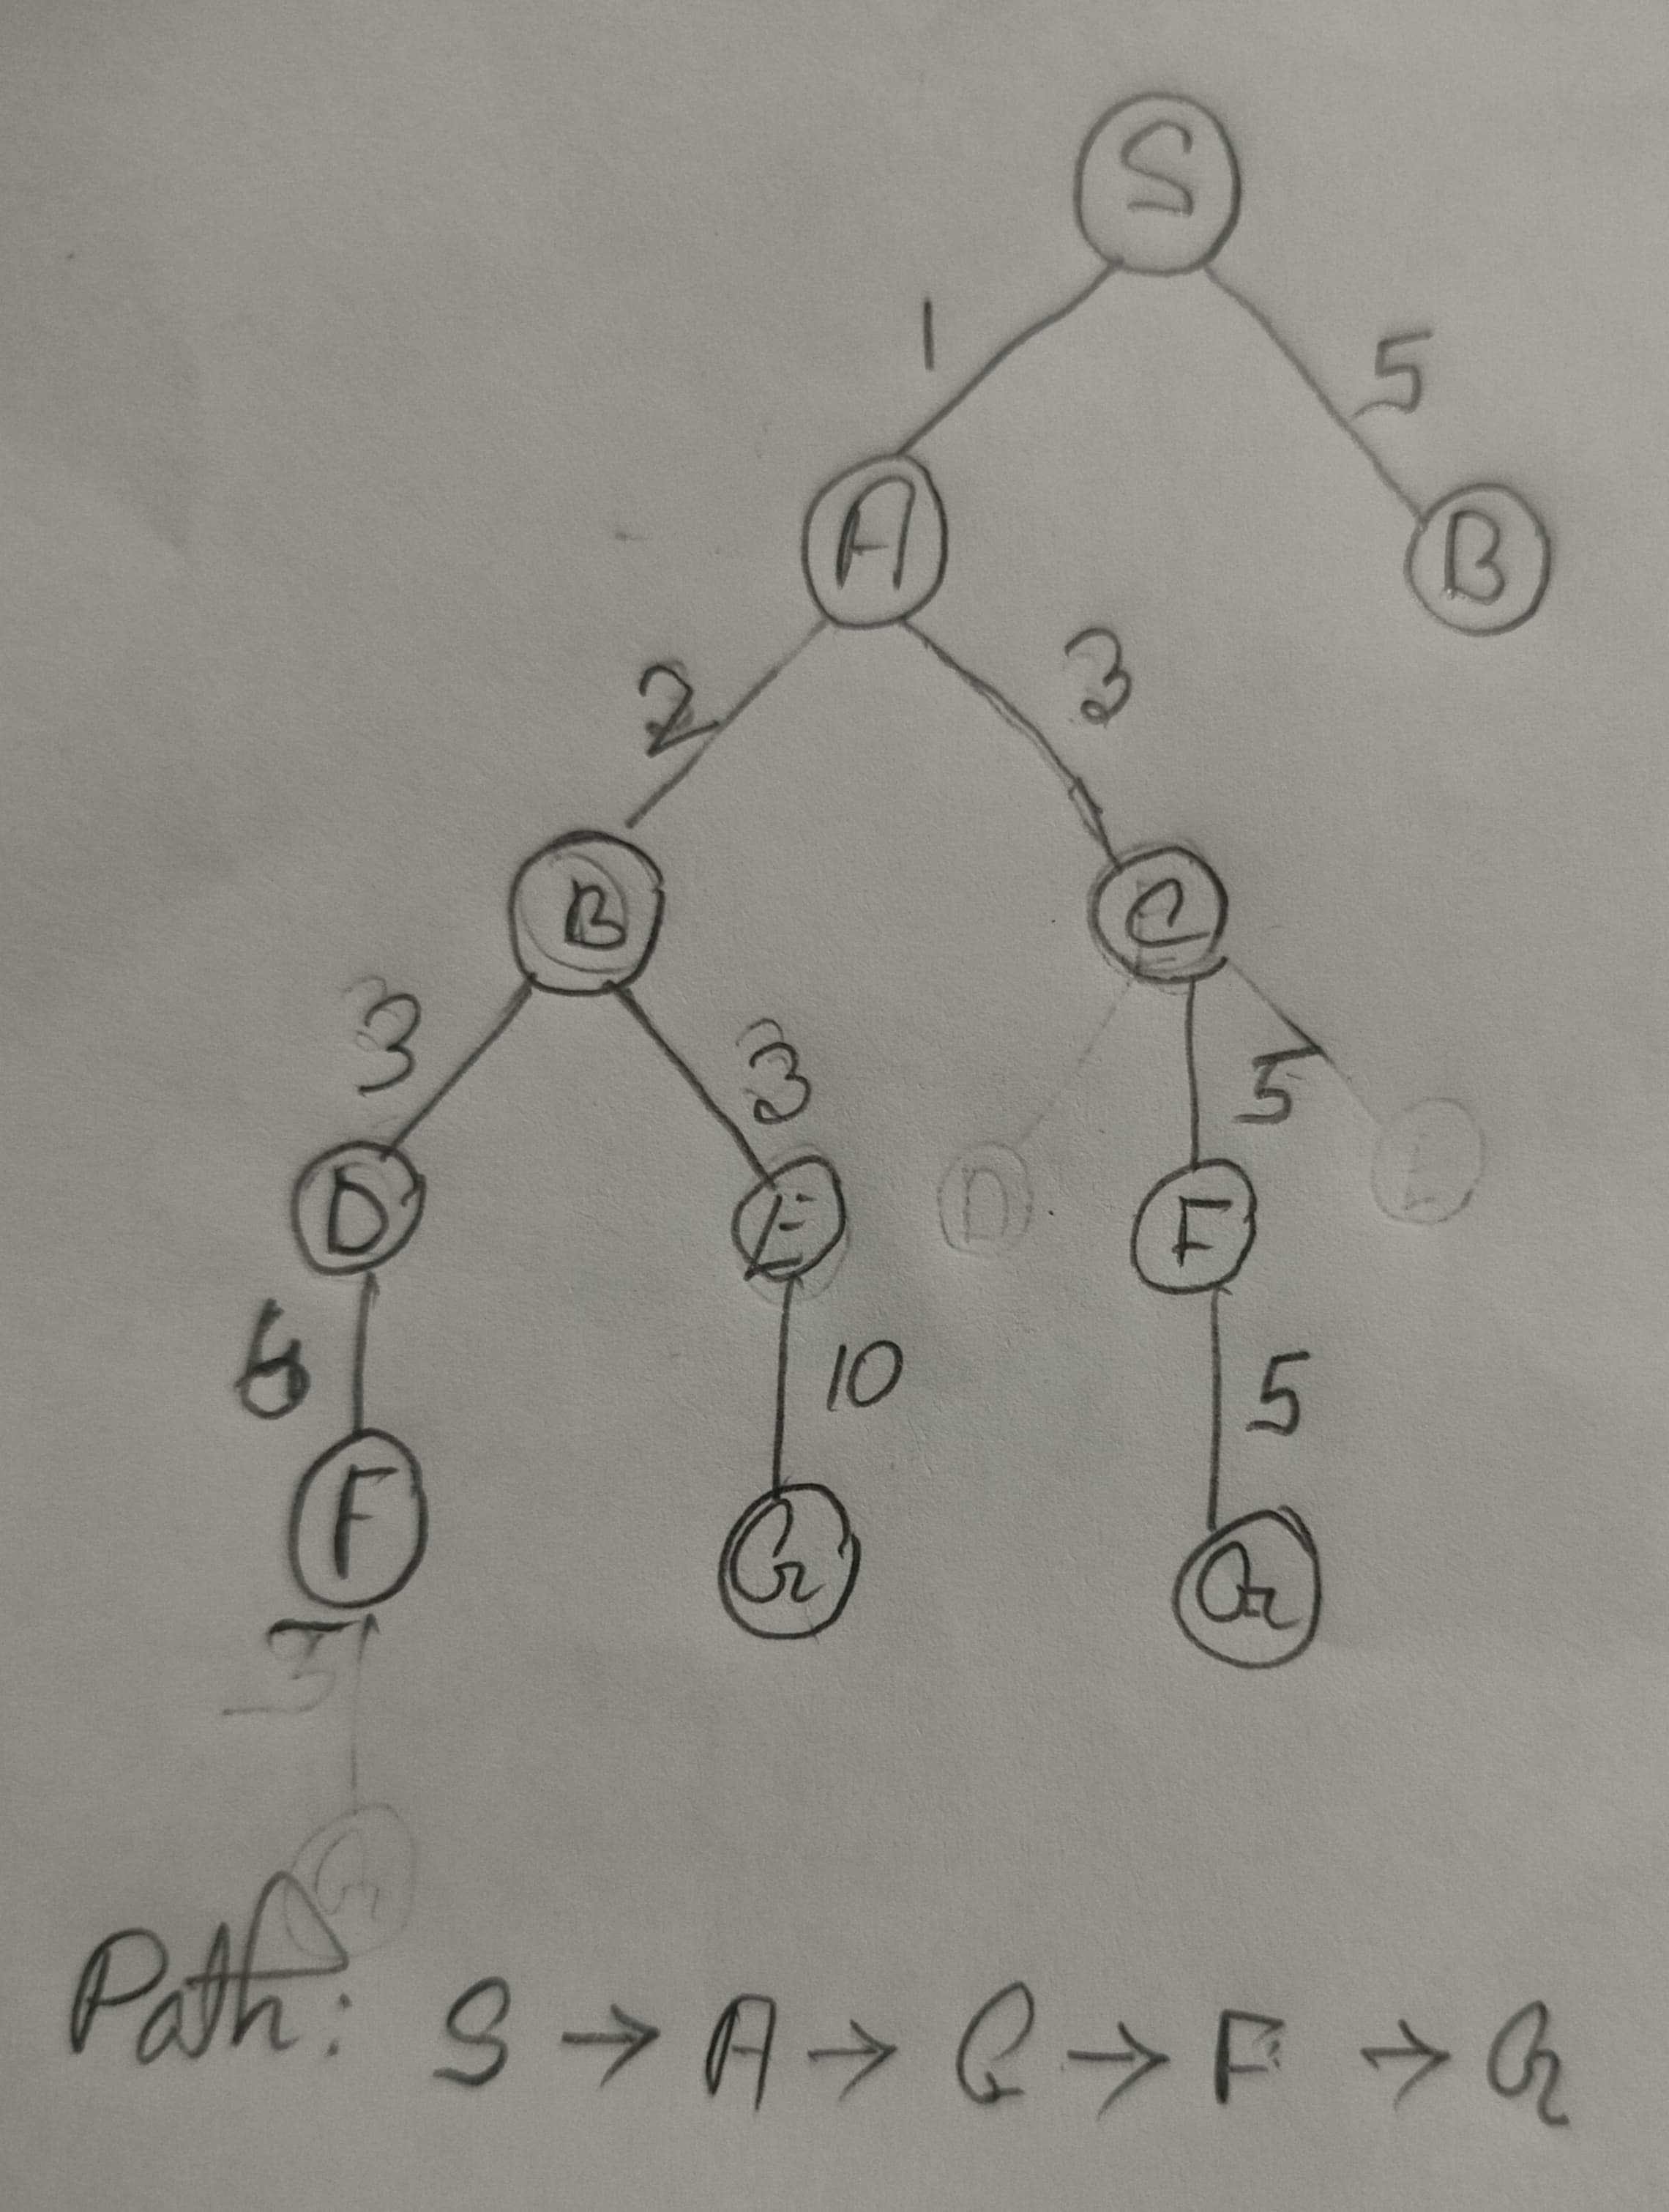

In [ ]:
# call GBFS for the above graph here
gbfs('S', 'G', example_graph, h_another_exm) # change source only


S selected. Cost: 9
[1]: S expanding...
S->A : 1
S->B : 5
B: 6
A: 8

B selected. Cost: 6
[2]: B expanding...
B->D : 3
B->E : 3
D: 4
A: 8
E: 6

D selected. Cost: 4
[3]: D expanding...
D->F : 6
F: 3
A: 8
E: 6

F selected. Cost: 3
[4]: F expanding...
F->G : 5
G: 0
A: 8
E: 6

G selected. Cost: 0
*** GOAL TEST SATISFIED ***



(0, 'G', ['S', 'B', 'D', 'F', 'G'], 19)

Based on the above GBFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)



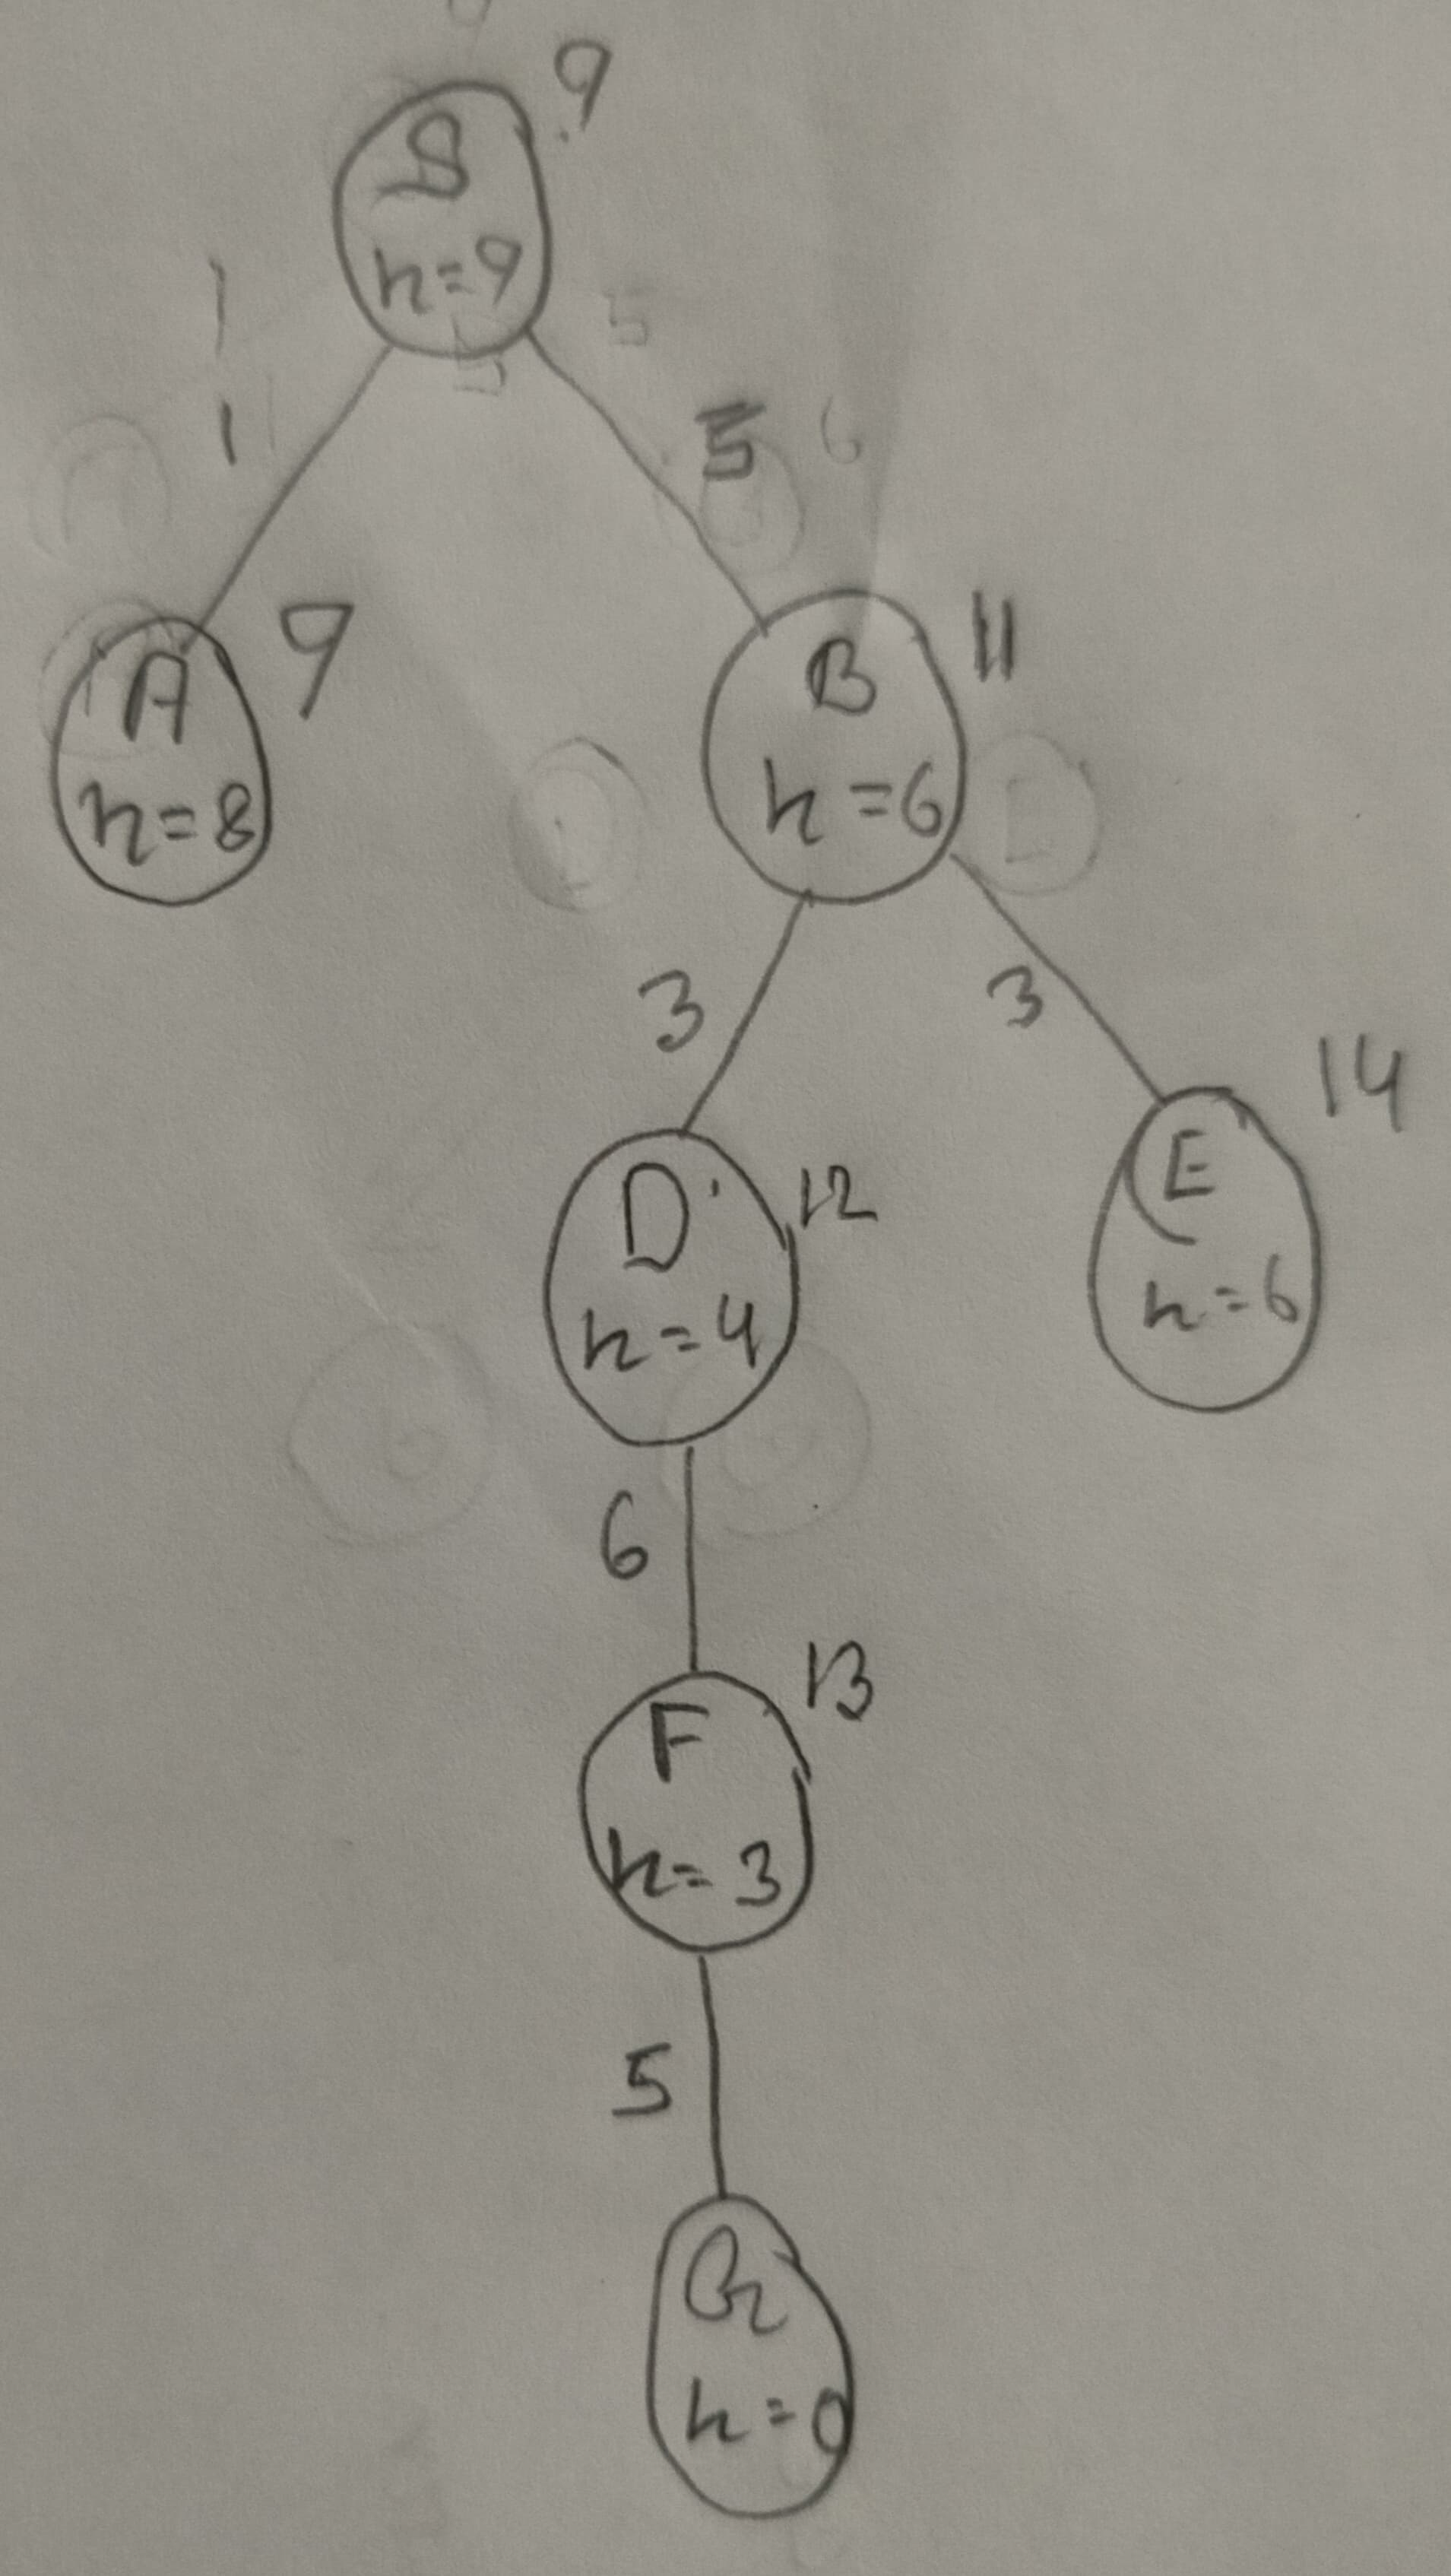

In [ ]:
# call A* for the above graph here

a_star('S', 'G', example_graph, h_another_exm) # change source only


S selected. Cost: 9
[1]: S expanding...
S->A : 1
S->B : 5
A: 9
B: 11

A selected. Cost: 9
[2]: A expanding...
A->B : 2
A->C : 3
B: 9
B: 11
C: 11

B selected. Cost: 9
[3]: B expanding...
B->D : 3
B->E : 3
D: 10
C: 11
B: 11
E: 12

D selected. Cost: 10
[4]: D expanding...
D->F : 6
B: 11
C: 11
E: 12
F: 15

C selected. Cost: 11
[5]: C expanding...
C->F : 5
E: 12
F: 15
F: 12

E selected. Cost: 12
[6]: E expanding...
E->G : 10
F: 12
F: 15
G: 16

F selected. Cost: 12
[7]: F expanding...
F->G : 5
G: 14
G: 16
F: 15

G selected. Cost: 14
*** GOAL TEST SATISFIED ***



(14, 'G', ['S', 'A', 'C', 'F', 'G'], 14)

Based on the above A* simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)


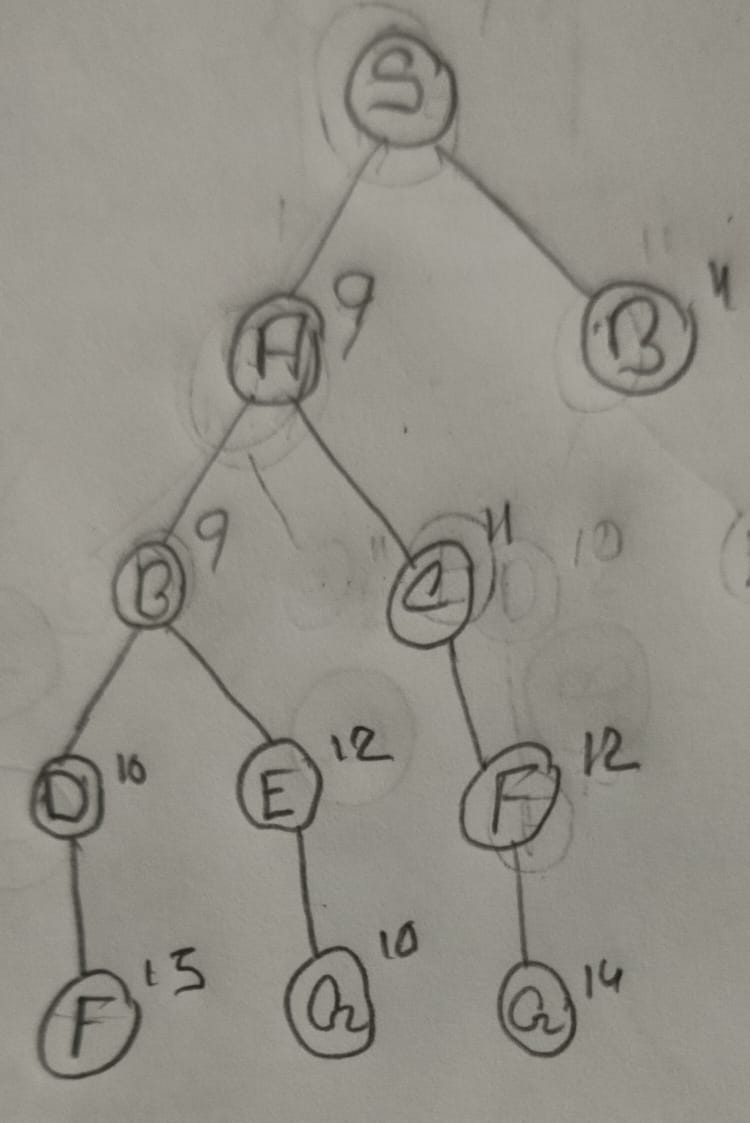

# New Exercise